### Write a program in python to demonstrate Handwritten Digit Recognition on MNIST dataset. 

In [46]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [48]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [49]:
train_images=train_images/255.0
test_images=test_images/255.0

In [50]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [52]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8648 - loss: 0.4764
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9544 - loss: 0.1526
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0892
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9775 - loss: 0.0734


In [59]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test accuracy: ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9743 - loss: 0.0887
Test accuracy:  0.9768000245094299


In [60]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


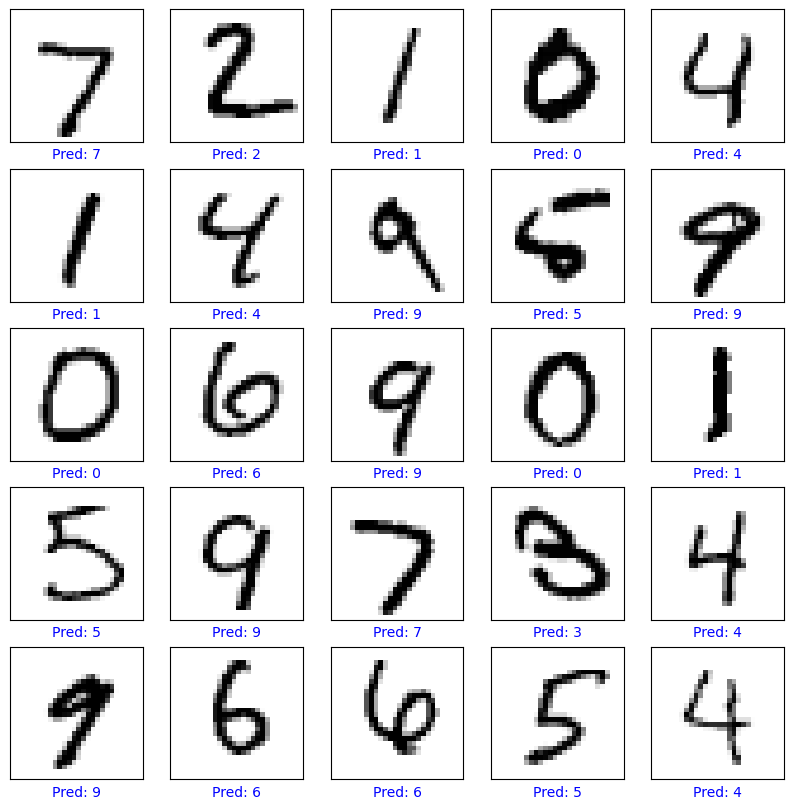

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[i], cmap='binary')

    pred = predictions[i].argmax()
    true = test_labels[i].argmax()
    color = 'blue' if pred == true else 'red'

    plt.xlabel(f'Pred: {pred}', color=color)

plt.show()
